In [33]:
import warnings
warnings.filterwarnings('ignore') #ignore warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

# Import Data

In [3]:
# set path for data
#raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
#train_file_path = os.path.join(raw_data_path, 'train.csv')
#test_file_path = os.path.join(raw_data_path, 'test.csv')

In [14]:
# read data
train_df = pd.read_csv('train.csv', index_col= 'PassengerId')
test_df = pd.read_csv('test.csv', index_col = 'PassengerId')

In [15]:
type(train_df)

pandas.core.frame.DataFrame

# Exploring data_Basic structure

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [18]:
# add survuved with default value for test_df
test_df['Survived'] = -888


In [19]:
# concat train and test
df = pd.concat((train_df, test_df), axis = 0) #axis = 1, concat on side
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [20]:
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742


In [23]:
# indexing
df.loc[7:12, ['Age', 'Fare']]

,Age,Fare
PassengerId,,
7,54.0,51.8625
8,2.0,21.0750
9,27.0,11.1333
10,14.0,30.0708
11,4.0,16.7000
12,58.0,26.5500


In [27]:
# filtering
male_passenger = df.loc[df.Sex == 'male']
print ('number of male passenger:{0} '.format(len(male_passenger)))

number of male passenger:843 


In [28]:
# and or
male_first_class = df.loc[((df.Sex =='male') & (df.Pclass == 1))]
print ('number of first class male passengers: {0}'.format(len(male_first_class)))

number of first class male passengers: 179


# summary statistics

In [31]:
df.describe() # get numeric columns

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


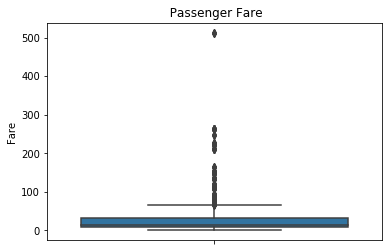

In [36]:
# boxplot fare
fare_box = sns.boxplot( y = 'Fare', data = df)
fare_box.set_title("  Passenger Fare ")
plt.show()

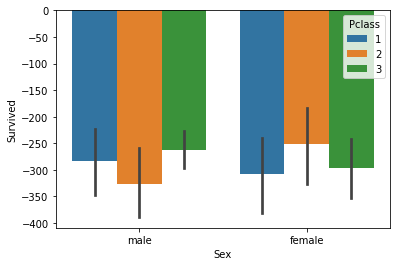

In [37]:
# barplot
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = df)
plt.show()

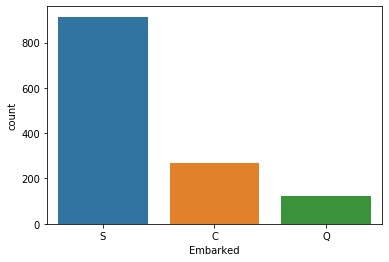

In [40]:
# category_ counts
sns.countplot(x = 'Embarked', data = df)
plt.show()

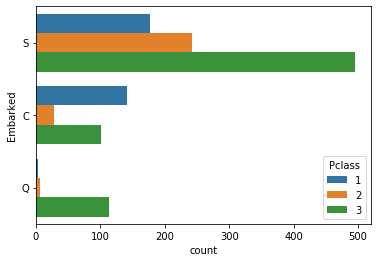

In [41]:
# category_counts-hue
sns.countplot(y = 'Embarked', hue = 'Pclass', data = df)
plt.show()

In [45]:
# category
df[df.Survived != -888].Survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

# Distribution

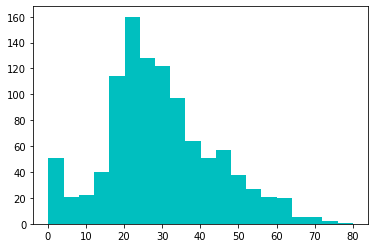

In [48]:
# univariate_hist
plt.hist(df.Age, color = 'c', bins = 20)
plt.show()

In [49]:
print('skewness for age: {0: .2f}'.format(df.Age.skew()))

skewness for age:  0.41


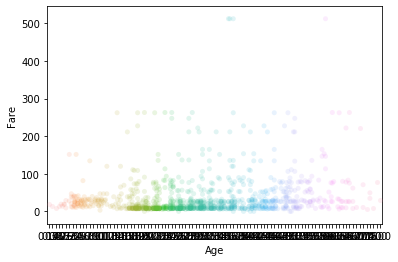

In [54]:
# bivariate_scatter
sns.swarmplot(x = 'Age', y = 'Fare', data = df, alpha = 0.15) # use alpha to set transparency
plt.show()

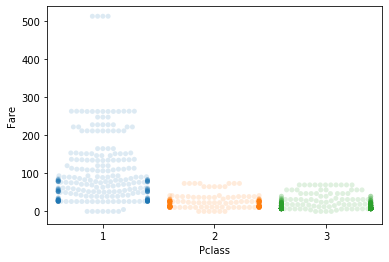

In [55]:
sns.swarmplot(x = 'Pclass', y = 'Fare', data = df, alpha = 0.15) # use alpha to set transparency
plt.show()

# Grouping

In [56]:
# groupby
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [57]:
df.groupby(['Pclass']).agg({'Fare': 'mean', 'Age': 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [58]:
df.groupby(['Pclass', 'Embarked']).Fare.mean()

Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.148094
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

In [61]:
# more complicated agg
aggregations = {
    'Fare':{# working on fare column
        'mean_fare': 'mean',
        'median_fare': 'median',
        'max_fare': max,
        'min_fare': np.min
        
    }, # dont forget ,
    'Age':{
        'median_age': 'median',
        'range_age': lambda x : max(x) - min(x) #calculate range per group
        
    }
}
df.groupby(['Pclass']).agg(aggregations)

Fare                                       Age          
        mean_fare median_fare  max_fare min_fare median_age range_age
Pclass                                                               
1       87.508992     60.0000  512.3292      0.0       39.0     79.08
2       21.179196     15.0458   73.5000      0.0       29.0     69.33
3       13.302889      8.0500   69.5500      0.0       24.0     73.83

# crosstab

In [63]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


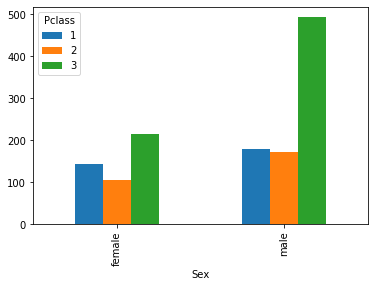

In [64]:
pd.crosstab(df.Sex, df.Pclass).plot(kind = 'bar')

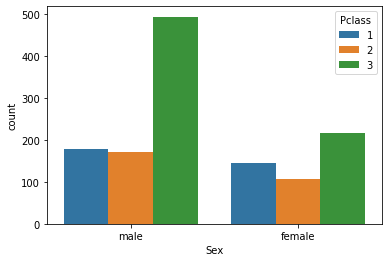

In [66]:
sns.countplot(x = 'Sex', hue = 'Pclass', data = df)
plt.show()

# pivot table

In [68]:
df.pivot_table(index = 'Sex', columns = 'Pclass', values = 'Age', aggfunc = 'mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [70]:
#or use groupby
df.groupby(['Sex', 'Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [ ]:
# 